In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
df1 = pd.DataFrame({'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
                    'group': ['01', '02', '02', '01','02']})
df2 = pd.DataFrame({'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit'],
                    'GPA': ['7.8', '6.4', '8.3', '9', '10']})

In [77]:
# inner join по умолчанию (данные которые совпадают)
pd.merge(df1, df2, left_on='Student', right_on='Name')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9


In [80]:
# left / right join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='right')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,NaN,NaN,Kit,10


In [82]:
# Полностью соединили
pd.merge(df1, df2, left_on='Student', right_on='Name', how='outer')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN
5,NaN,NaN,Kit,10


In [83]:
# Замена индекса
df1.set_index('Student')

,group
Student,
Tom,01
Ujin,02
Ann,02
Polina,01
Sam,02


In [84]:
# Вернуть индексс в колонку
df1.reset_index()

,index,Student,group
0,0,Tom,01
1,1,Ujin,02
2,2,Ann,02
3,3,Polina,01
4,4,Sam,02


In [21]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

In [22]:
df1

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42


In [23]:
df2

,name,students
0,Ahmed,50
1,Andrey,40


In [24]:
# Склеить 2 таблицы, как union в sql
# Но индексы сохранились каждой таблицы
#pd.concat([df1, df2])

In [25]:
# Сброс индексов
pd.concat([df1, df2]).reset_index(drop=True)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42
4,Ahmed,50
5,Andrey,40


In [26]:
df_perf = pd.read_csv('performer_table.csv', sep=';')
df_title = pd.read_csv('title_table.csv', sep=';')
df_genre = pd.read_csv('music_style_table.csv', sep=';')
df_stat = pd.read_csv('title_stat_table.csv', sep=';')

In [27]:
df_perf.head()

,id_performer,performer
0,99991,2маши
1,99992,лазарев
2,99993,мумий_тролль
3,99994,нюша
4,99995,classical_channel


In [28]:
df_title.head()

,id_title,title
0,98765431,"""#2Маши ""Свободные линии"""
1,98765432,"""Моя любимая кухня"". Дорада на скорую руку"
2,98765433,"""Моя любимая кухня"". Спецвыпуск. Что мы покупа..."
3,98765434,"# 2 МАШИ ""Теперь Нас Двое"""
4,98765435,"# 2 Маши "" Мысли"" .."


In [29]:
df_genre.head()

,id_music_style,music_style
0,12345,popsa
1,12346,rock
2,12347,classic
3,12348,indi
4,12349,estrada


In [30]:
df_stat.head()

,id_title,commentCount,dislikeCount,likeCount,id_music_style,id_performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,98765431,34.0,43.0,1402.0,12345,99991,214301.0,24.0,0.0,1141
1,98765432,36.0,90.0,512.0,12345,99991,74666.0,27.0,0.0,2160
2,98765433,5.0,5.0,132.0,12345,99991,17766.0,4.0,0.0,2164
3,98765434,5.0,14.0,153.0,12345,99991,15176.0,4.0,0.0,1317
4,98765435,51.0,79.0,1963.0,12345,99991,377074.0,28.0,0.0,1246


<AxesSubplot:>

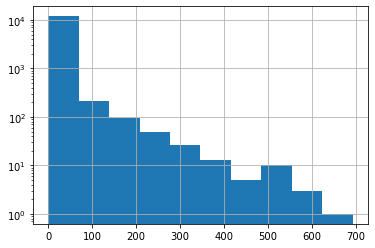

In [31]:
df_stat['comments_obscene_cnt'].hist(log=True)

In [32]:
df_stat.groupby(by='id_performer')[['comments_obscene_cnt']].mean()

,comments_obscene_cnt
id_performer,
99991,2.592920
99992,2.148148
99993,1.285319
99994,0.685185
99995,1.710526
...,...
100097,6.900000
100098,29.410714
100099,NaN


In [33]:
df_agg = df_stat.groupby('id_performer').agg({
    'comments_obscene_cnt': np.median,
    'id_performer': 'count'
    
})

In [34]:
df_agg.head()

,comments_obscene_cnt,id_performer
id_performer,,
99991,0.0,126
99992,0.0,280
99993,0.0,405
99994,0.0,415
99995,0.0,298


In [35]:
df_perf

,id_performer,performer
0,99991,2маши
1,99992,лазарев
2,99993,мумий_тролль
3,99994,нюша
4,99995,classical_channel
...,...,...
106,100097,гречка
107,100098,мот
108,100099,деревянные киты
109,100100,пошлая_молли


In [36]:
df_perf = df_perf.set_index('id_performer')
df_title.set_index('id_title', inplace=True)
df_genre.set_index('id_music_style', inplace=True)

In [37]:
df_agg.join(df_perf).sort_values('comments_obscene_cnt', ascending=False)

,comments_obscene_cnt,id_performer,performer
id_performer,,,
100100,269.0,14,пошлая_молли
100101,260.0,11,хаски
100076,130.0,25,face
100050,69.0,72,oxxxymiron
100086,31.0,53,лсп
...,...,...,...
100053,NaN,38,казускома
100059,NaN,44,буйнов
100060,NaN,30,retuses


In [38]:
df_stat

,id_title,commentCount,dislikeCount,likeCount,id_music_style,id_performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,98765431,34.0,43.0,1402.0,12345,99991,214301.0,24.0,0.0,1141
1,98765432,36.0,90.0,512.0,12345,99991,74666.0,27.0,0.0,2160
2,98765433,5.0,5.0,132.0,12345,99991,17766.0,4.0,0.0,2164
3,98765434,5.0,14.0,153.0,12345,99991,15176.0,4.0,0.0,1317
4,98765435,51.0,79.0,1963.0,12345,99991,377074.0,28.0,0.0,1246
...,...,...,...,...,...,...,...,...,...,...
19119,98784550,2933.0,4587.0,67933.0,12351,100101,3576812.0,1705.0,422.0,609
19120,98784551,5035.0,3822.0,105560.0,12351,100101,2872692.0,1870.0,218.0,196
19121,98784552,7690.0,18647.0,114810.0,12351,100101,7576134.0,1843.0,327.0,835
19122,98784553,1232.0,532.0,17126.0,12351,100101,719846.0,570.0,66.0,2715


In [39]:
df_agg = df_stat.groupby('id_music_style').agg({'viewCount': np.max}).reset_index().set_index('viewCount')

In [40]:
df_agg

,id_music_style
viewCount,
132015566.0,12345
141509635.0,12346
196812152.0,12347
48972150.0,12348
43969730.0,12349
57860686.0,12350
272047706.0,12351


In [41]:
df_agg = df_agg.join(df_stat.set_index('viewCount'), lsuffix='_l').reset_index()

In [42]:
df_agg = df_agg[['viewCount', 'id_music_style', 'id_performer']]

In [43]:
df_agg

,viewCount,id_music_style,id_performer
0,43969730.0,12349,100026
1,48972150.0,12348,100054
2,57860686.0,12350,100004
3,132015566.0,12345,100047
4,141509635.0,12346,100032
5,196812152.0,12347,99995
6,272047706.0,12351,100029


In [44]:
df_genre

,music_style
id_music_style,
12345,popsa
12346,rock
12347,classic
12348,indi
12349,estrada
12350,shanson
12351,rap


In [45]:
df_agg.set_index('id_music_style').join(df_genre).reset_index()

,id_music_style,viewCount,id_performer,music_style
0,12349,43969730.0,100026,estrada
1,12348,48972150.0,100054,indi
2,12350,57860686.0,100004,shanson
3,12345,132015566.0,100047,popsa
4,12346,141509635.0,100032,rock
5,12347,196812152.0,99995,classic
6,12351,272047706.0,100029,rap


In [46]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

In [47]:
df1

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42


In [48]:
df2

,name,students
0,Ahmed,50
1,Andrey,40


In [49]:
a = pd.get_dummies(df1['name'])

In [50]:
df2['name'] = df2['name'].map({'Ahmed': 1234, 'Andrey': 6789})

In [51]:
df2

,name,students
0,1234,50
1,6789,40


In [52]:
df1.join(a)

,name,students,Max,Nastya,Phil,Vlad
0,Max,20,1,0,0,0
1,Phil,21,0,0,1,0
2,Vlad,30,0,0,0,1
3,Nastya,42,0,1,0,0


In [53]:
from datetime import datetime

In [54]:
datetime.today()

datetime.datetime(2021, 6, 14, 10, 59, 39, 801308)

In [55]:
datetime.today().year

2021

In [56]:
datetime.today().strftime('%d/%m/%Y')

'14/06/2021'

In [57]:
df = pd.read_csv('youtube_data_short.csv', sep='\t')

In [58]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [61]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
dtype: int64

In [ ]:
# Удаление строк где есть пропуски
df.dropna()

In [ ]:
# Удаление столбцов где есть пропуски
df.dropna(axis=1)

In [62]:
ser = pd.Series([24, np.nan, 28, 2])

In [63]:
ser

0    24.0
1     NaN
2    28.0
3     2.0
dtype: float64

In [64]:
ser.fillna(0)

0    24.0
1     0.0
2    28.0
3     2.0
dtype: float64

In [65]:
# Заполнение прошлым значением
ser.fillna(method='ffill')

0    24.0
1    24.0
2    28.0
3     2.0
dtype: float64

In [66]:
# Заполнение следующим значением
ser.fillna(method='bfill')

0    24.0
1    28.0
2    28.0
3     2.0
dtype: float64

In [87]:
students1 = pd.DataFrame({'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'], 'height_cm': [170, 165, 171, 168]})

In [88]:
students1

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168


In [90]:
students1.loc[4] = ['Phil', 210]

In [94]:
# Медиана в отличие от сренего устойчива к выбросам
students1.height_cm.median()

170.0

In [95]:
students1.height_cm.mean()

176.8

In [96]:
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361
...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997


In [106]:
# Можно откинуть 1% выборки, где больше всего лайков (т.е. выбросы)
# Используем 99% персетиль
threshold = df.likeCount.quantile(0.99)

In [107]:
# Берем значения которые меньше или равны
df_clear = df[df.likeCount <= threshold]

<AxesSubplot:>

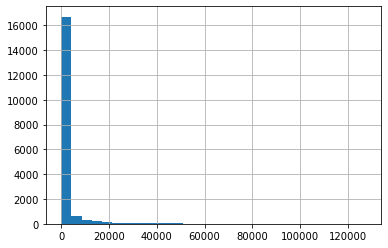

In [108]:
df_clear.likeCount.hist(bins=30)